In [1]:
import numpy as np
import os
import torch
import matplotlib.pyplot as plt
from PIL import Image
import random

from sklearn.metrics import roc_auc_score, average_precision_score
from ood_metrics import calc_metrics
import numpy as np

In [2]:
 def Statistic(result_index, lim_min = 0.0,  lim_max = 0.25):   
    dir_set = f"result/BDD_OOD_{result_index}/result/"
    ID_score = np.load(dir_set + "ID_scores.npy")
    OOD_score = np.load(dir_set + "OOD_scores.npy")
    total_sample = len(ID_score)+len(OOD_score)

    print(f"Total sample: {total_sample}\n  + ID sample: {len(ID_score)} \n  + OOD sample: {len(OOD_score)}")

    # print(index)
    # print("Training with 1 milllion iterations with batch_size = 2\nMask type: checkerboard 4x4")

    plt.hist(ID_score, bins=50, range=(lim_min, lim_max), alpha = 0.75, color='green', label="ID Score")
    plt.hist(OOD_score, bins=50, range=(lim_min, lim_max), alpha = 0.75, color='purple', label="OOD Score")

    plt.axvline(ID_score.mean(), color='red', linestyle='dashed', linewidth=1)
    min_ylim, max_ylim = plt.ylim()
    plt.text(ID_score.mean()*0.3, max_ylim*0.8, 'Meen ID score: {:.3f}'.format(ID_score.mean()))
    plt.axvline(OOD_score.mean(), color='red', linestyle='dashed', linewidth=1)
    min_ylim, max_ylim = plt.ylim()
    plt.text(OOD_score.mean()*0.3, max_ylim*0.6, 'Mean OOD score: {:.3f}'.format(OOD_score.mean()))
    plt.legend()
    plt.show()

    scores = np.append(OOD_score, ID_score)
    labels = np.append(np.ones_like(OOD_score), np.zeros_like(ID_score))

    result = calc_metrics(scores, labels)
    print(f"AUROC (↑) : {result['auroc']}")
    print(f"FPR@95 (↓) : {result['fpr_at_95_tpr']}")
    print(f"Detection Error (↓) : {result['detection_error']}")
    print(f"AUPR ID (↑) : {result['aupr_in']}")
    print(f"AUPR OOD (↑) : {result['aupr_out']}")

In [3]:
def Illustration(result_index, n_sample =40):
    dir_set = f"result/BDD_OOD_{result_index}/result/"
    
    ID_score = np.load(dir_set + "ID_scores.npy")
    OOD_score = np.load(dir_set + "OOD_scores.npy")
    
    total_sample = len(ID_score)+len(OOD_score)
    index = random.sample(range(0, total_sample), n_sample)

    for idx, img_name in enumerate(os.listdir(dir_set)):
        if "png" in img_name and idx in index:
            img = Image.open(dir_set + img_name)
            plt.imshow(img)
            plt.axis('off')
            plt.show()

Total sample: 1947
  + ID sample: 1366 
  + OOD sample: 581


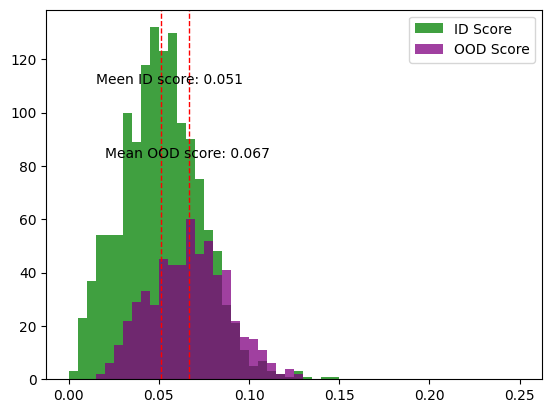

AUROC (↑) : 0.6921083203342548
FPR@95 (↓) : 0.8118594436310396
Detection Error (↓) : 0.2689650653810442
AUPR ID (↑) : 0.4690491468089395
AUPR OOD (↑) : 0.8369776086531366


In [4]:
Statistic("checkerboard8_1500000")

Total sample: 1947
  + ID sample: 1366 
  + OOD sample: 581


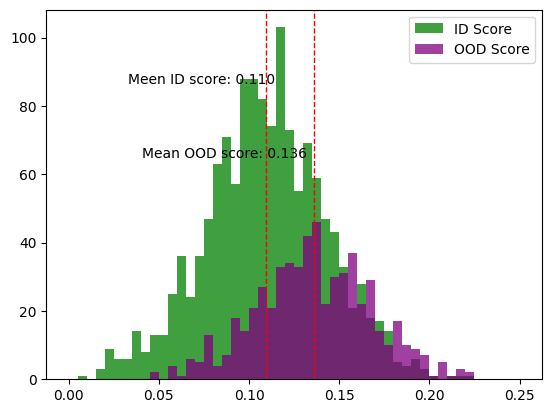

AUROC (↑) : 0.7173513128019292
FPR@95 (↓) : 0.8308931185944363
Detection Error (↓) : 0.2762346802602423
AUPR ID (↑) : 0.5073117322836275
AUPR OOD (↑) : 0.8485158404002995


In [5]:
Statistic("checkerboard4_1000000")

Total sample: 1947
  + ID sample: 1366 
  + OOD sample: 581


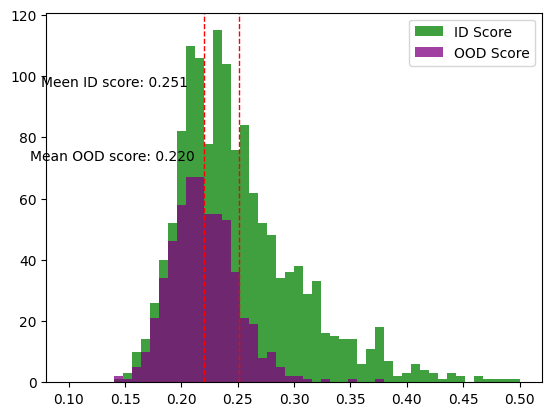

AUROC (↑) : 0.3244204594995754
FPR@95 (↓) : 0.9692532942898975
Detection Error (↓) : 0.29840780688238316
AUPR ID (↑) : 0.21327964856783407
AUPR OOD (↑) : 0.6149176118457981


In [6]:
Statistic("center_1000000", lim_min = 0.1, lim_max = 0.5)

In [7]:
# Illustration("checkerboard4_1000000")

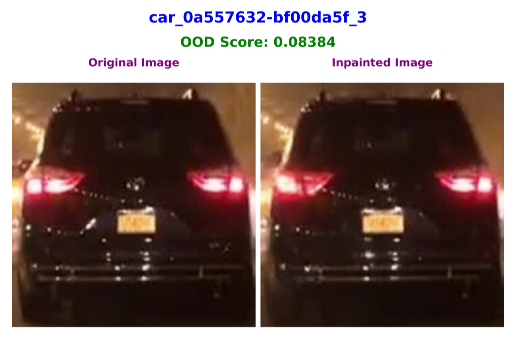

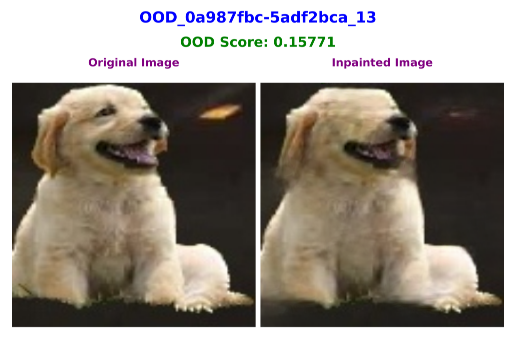

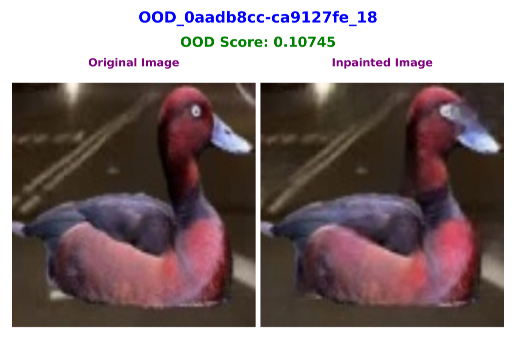

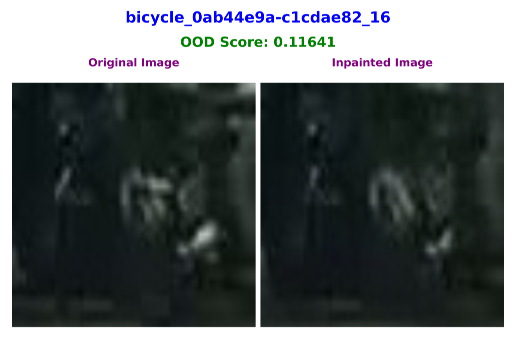

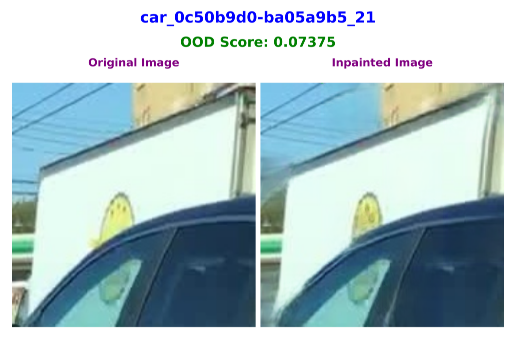

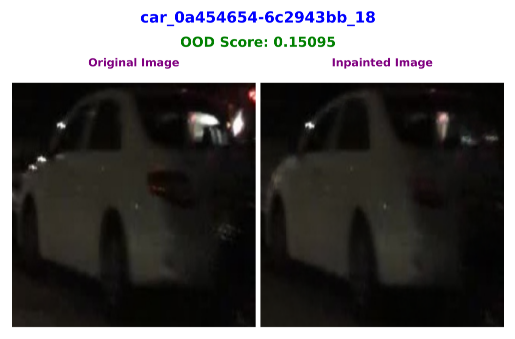

KeyboardInterrupt: 

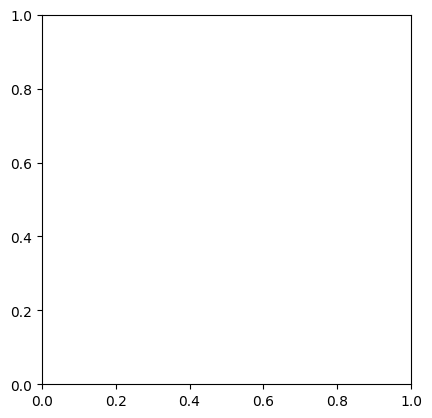

In [9]:
Illustration("checkerboard4_1000000")